# Matplotlib
Knihovna pro zobrazování dat.

Existují další knihovny jako 
- plotly
- seaborn

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv ('../dataset/salary_dataset.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,1979
1,1.3,2498
2,1.5,1857
3,2.0,2295
4,2.2,2020


In [5]:
# rozdělení dat do dvou bloků proměnných - vstupní/vysvětlující a cílový/vysvětlovaný
inputs=data["YearsExperience"]
targets=data["Salary"]

In [6]:
inputs.head(3)

0    1.1
1    1.3
2    1.5
Name: YearsExperience, dtype: float64

In [7]:
targets.head(3)

0    1979
1    2498
2    1857
Name: Salary, dtype: int64

# Pojmy v matplotlib knihovně

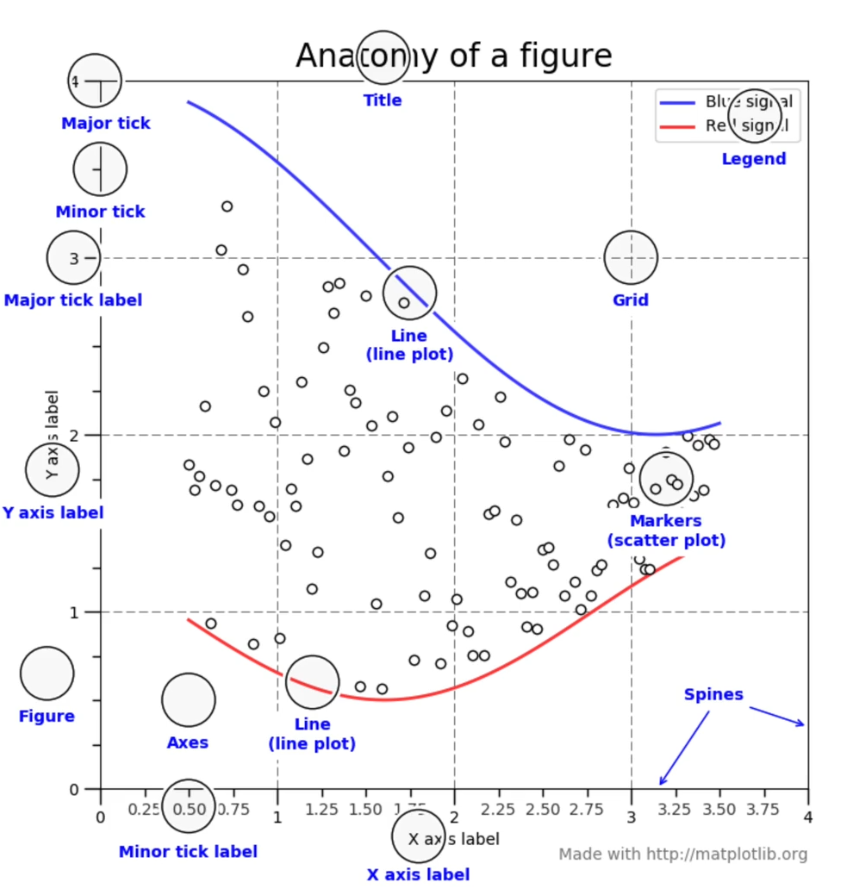

 - figure - celý objekt/obrázek, může obsahovat více grafů
 - ax     - graf

## Bodový graf

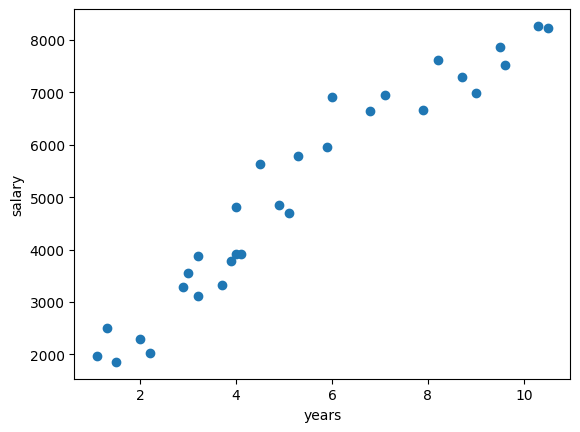

In [8]:
fig1 = plt.figure()                # vytvoření grafu
plt.scatter(inputs, targets)       # scatter - bodový graf
plt.xlabel("years")                # popis osy
plt.ylabel("salary")               # popis osy
plt.show()                         # zobrazení grafu

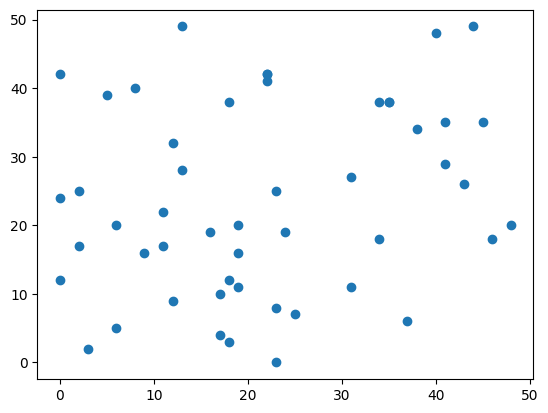

In [9]:
# vygenerování 50 náhodných čísel od 0 do 50
x=np.random.randint(low=0, high=50, size=50)   
y=np.random.randint(0, 50, 50)

# graf lze zobrazit rovnou, pokud není třeba doplňovat dekorace
plt.scatter(x, y)

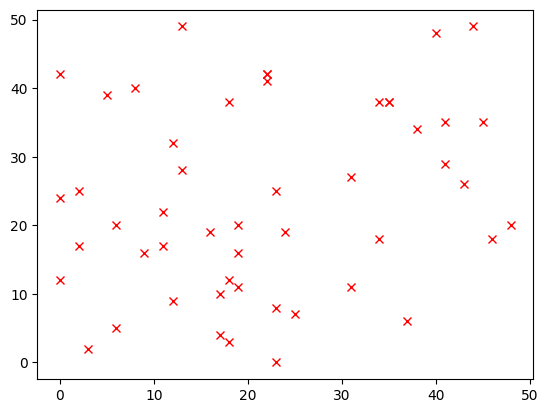

In [10]:
# barva a tvar bodů lze definovat
plt.plot(x, y, "rx")

## Čárový graf - plot

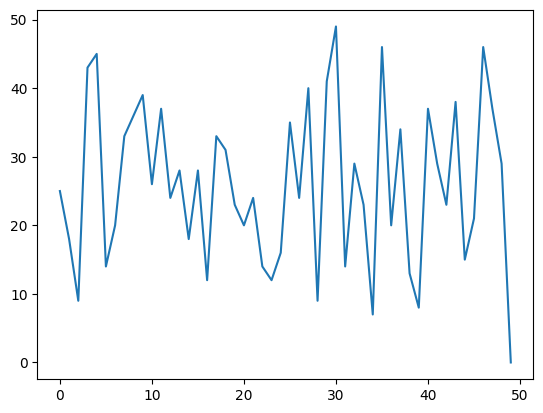

In [11]:
# zobrazení náhodného čárového grafu
# x souřadnice se doplní od 0 po 1
y=np.random.randint(0, 50, 50)
plt.plot(y)

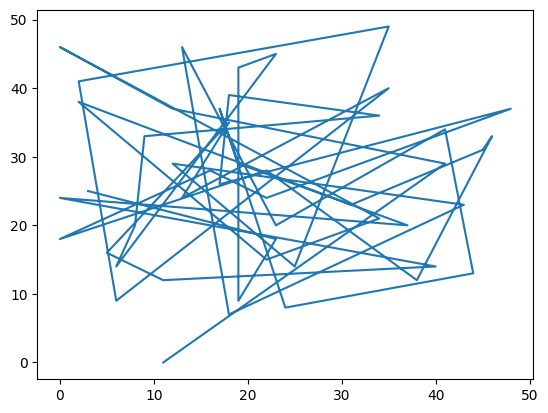

In [12]:
# pospojování náhodných bodů
plt.plot(x, y)

## Kombinace více dat v grafu

In [13]:
def linear(x, a, b):
    """ Lineární funkce """
    return a*x + b

In [14]:
# nastavení parametrů lineární funkce
a=740
b=1200
x=np.linspace(start=0, stop=11, num=10)  # vytvoření n pravidelnych vzdaleností v intervalu

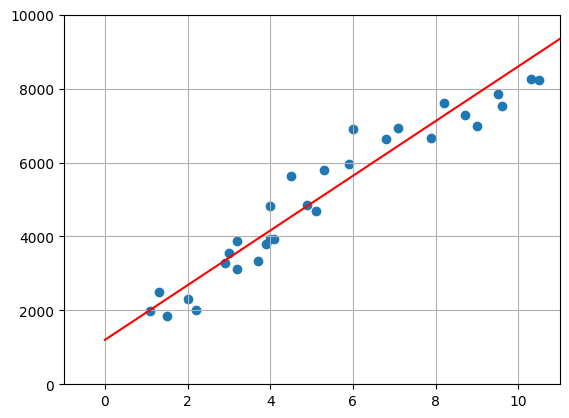

In [15]:
fig2 = plt.figure()
plt.scatter(inputs, targets)               # scatter - vykreslení bodů
plt.plot(x, linear(x, a, b), color='red')  # plot - vykreslení propojených bodů
plt.ylim(-1, 10000)                        # omezení osy y
plt.xlim(-1, 11)                           # omezení osy x
plt.grid()                                 # zobrazení mřížky
plt.show()

## Sloupcový - bar

<BarContainer object of 3 artists>

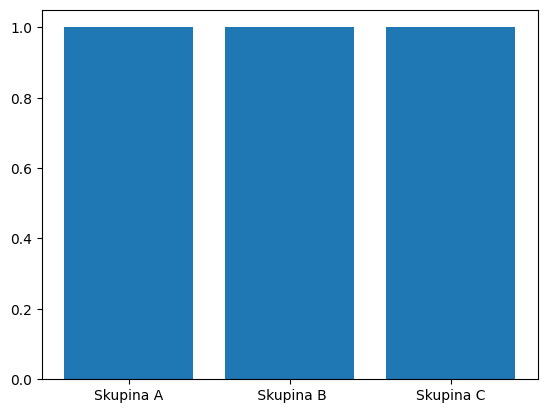

In [16]:
x=np.random.randint(0, 100, 1000)
# zjištění četností náhodně genrovaných hodnot x
A = len([x | (x < 33) ])
B = len([x | (x >=33) & (x <66 )])
C = len([x | (x >= 66) ])
plt.bar (["Skupina A", " Skupina B", "Skupina C"], [A, B ,C])

## Histogram - hist

(array([181., 204., 212., 195., 208.]),
 array([ 0. , 19.8, 39.6, 59.4, 79.2, 99. ]),
 <BarContainer object of 5 artists>)

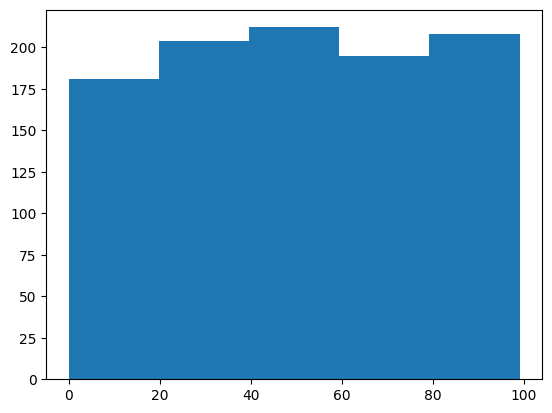

In [18]:
plt.hist(x, 5)

## Obrázky - imshow

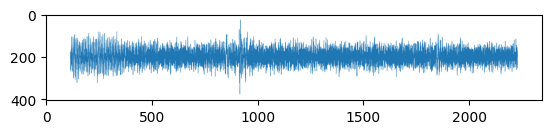

In [20]:
img = mpimage.imread ("../dataset/signal.png")
plt.imshow(img)

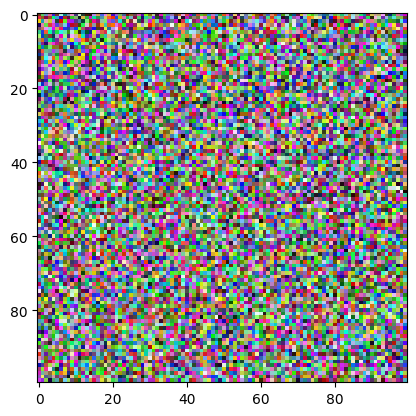

In [21]:
# vstupem může být matice 
#  - width x height x channels - matice pixelů - lepší pro matplotlib
#  - channels x width x height - vhodné pro ANN

# rozsah hodnot 0 - 255, 0 - 1

img = np.random.rand(100, 100, 3)
plt.imshow(img)

## Matice - matshow

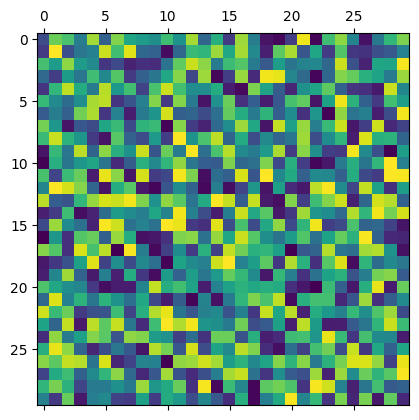

In [22]:
# hodnoty mohou mít libovolný rozsah hodnot
# světlejší hodnoty jsou vyšší
matice = np.random.rand(30, 30)
plt.matshow(matice)

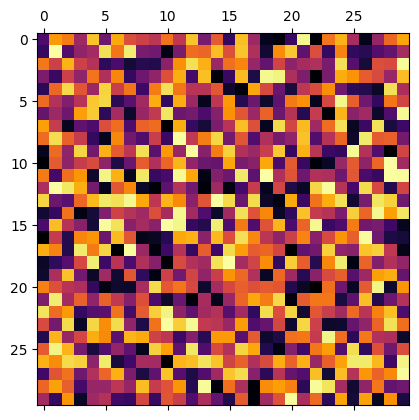

In [23]:
# různé barevné schémata - iridis, inferno, magma, ...
plt.matshow(matice, cmap="inferno")

## Koláč - pie

([<matplotlib.patches.Wedge at 0x10e5ce270>,
 [Text(0.15654621983618647, 1.088803600772426, 'A'),
  Text(-0.7858324260104415, -0.9068998832454134, 'B'),
  Text(0.9253791095416961, -0.5947045515411984, 'C')],
 [Text(0.08538884718337443, 0.593892873148596, '45%'),
  Text(-0.45840224850609085, -0.5290249318931577, '36%'),
  Text(0.5047522415681978, -0.32438430084065367, '18%')])

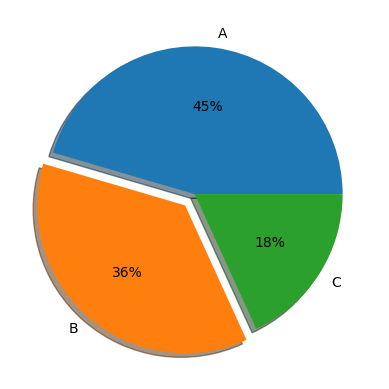

In [24]:
plt.pie ([50, 40, 20], explode=[0, 0.1, 0], labels=["A", "B", "C"], autopct="%i%%", shadow=True)

## Grafické úpravy grafu

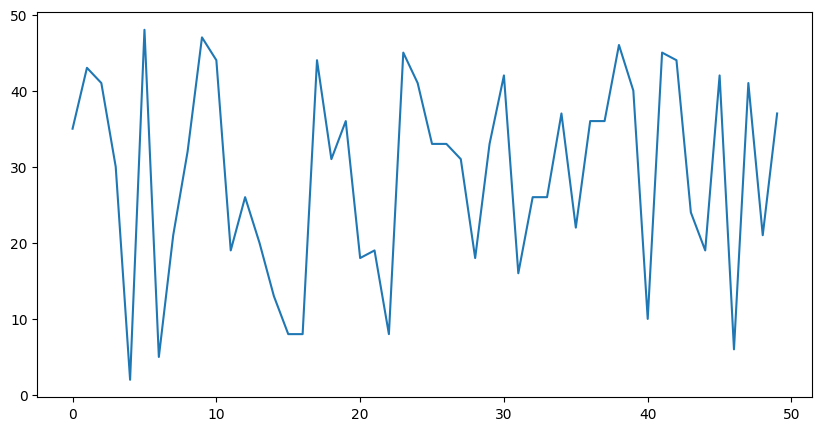

In [25]:
y = np.random.randint(0, 50, 50)
# figsize - velikost obrazku v palcich
plt.figure (figsize=(10, 5))
plt.plot(y)

In [26]:
# klouzavý průměr
def moving_average (a, n=3):
    ret = np.cumsum (a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n -1:] /n

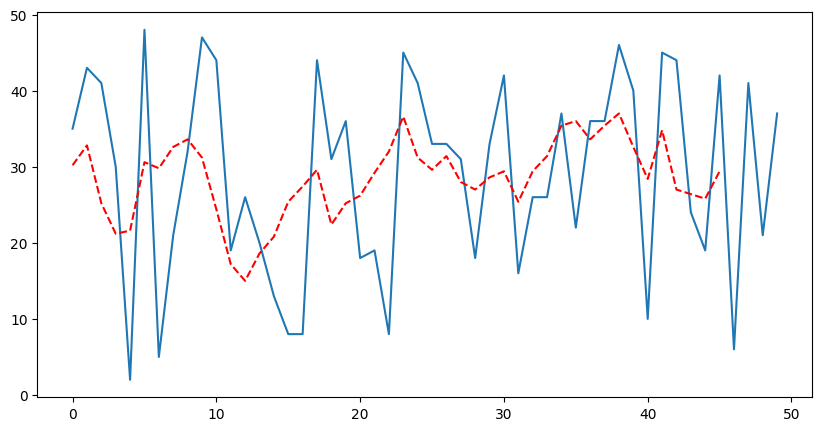

In [27]:
# styl cary
AVG = moving_average(y, 5)
plt.figure (figsize=(10, 5))
plt.plot(y)
plt.plot(AVG, "r--")
#plt.plot(AVG, "r:")
#plt.plot(AVG, "r-.")
#plt.plot(AVG, "r-.+")
#plt.plot(AVG, "r-.*")
#plt.plot(AVG, "r-.o")

Text(10, 14.8, 'min')

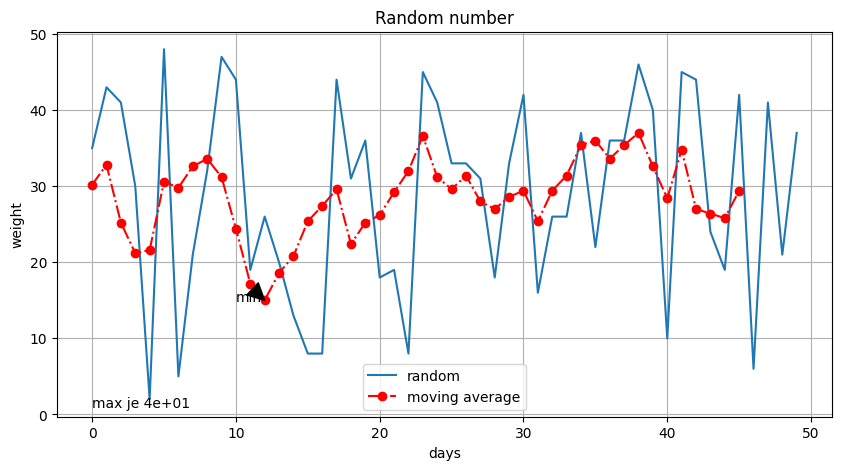

In [28]:
AVG = moving_average(y, 5)
plt.figure (figsize=(10, 5))
plt.plot(y, label="random")                      # label - popis řady
plt.plot(AVG, "r-.o", label="moving average")
plt.legend()
plt.title ("Random number")                      # název grafu
plt.xlabel("days")                               # popis osy
plt.ylabel("weight")                             # popis osy
plt.grid(True)                                   # mřížka

maxx=AVG.max()
miny=AVG.min()
minx=AVG.argmin()

plt.text (0, 0.9, f"max je {maxx:.1}")           # vložení textu
plt.annotate("min", xy=(minx, miny), xytext=(minx-2, miny-0.2), arrowprops={"color":"black"})    # vložení šipky

## Subplots
Více grafů v jednom obrázku


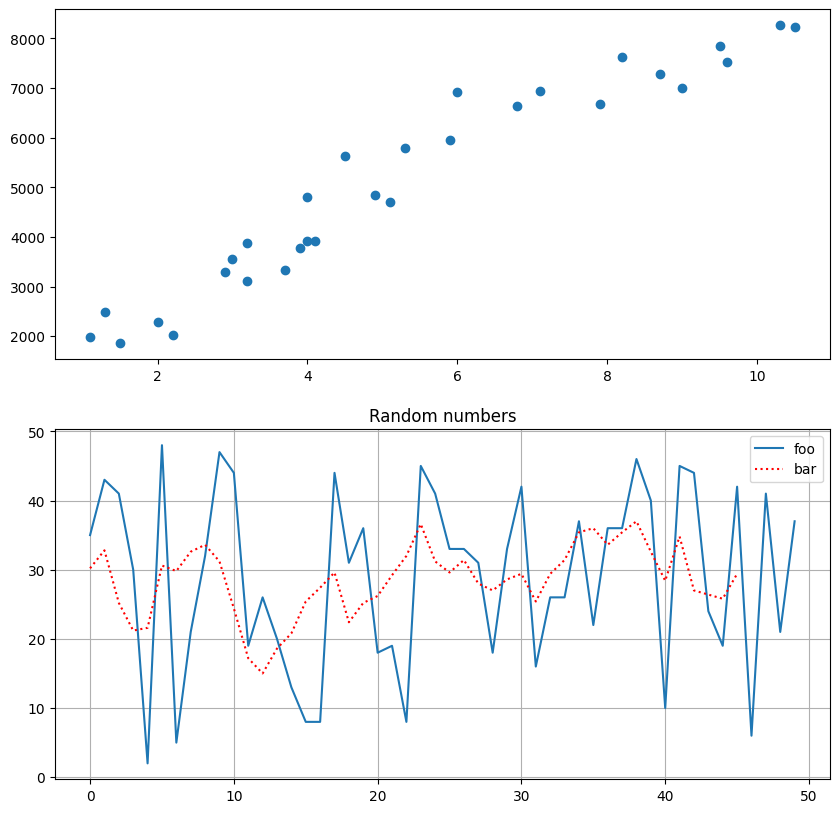

In [29]:
fig = plt.figure (figsize=(10, 10))
axes = fig.subplots (2, 1)           # pole jednotlivých grafů - 2 pod sebou.
ax1 = axes[0]
ax2 = axes[1]

ax1.scatter(inputs, targets)
ax2.plot(y)
ax2.plot(AVG, "r:")
ax2.legend(["foo", "bar"])
ax2.set_title("Random numbers")
ax2.set_xlabel="days"
ax2.set_ylabel="weight"
ax2.grid(True)

## 3D grafy

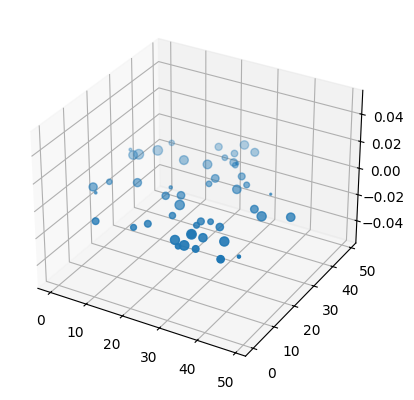

In [30]:
# vykreslení ve 3D
x1 = np.random.randint(0, 50, 50)
x2 = np.random.randint(0, 50, 50)
y = np.random.randint(0, 50, 50)

fig=plt.Figure()
ax = plt.axes(projection = '3d')
plt.scatter(x1, x2, y)
plt.show()

## Boxplot
- zobrazení střední hodnoty
- p25, p75
- vychýlených hodnot

In [32]:
import sqlite3
cur = sqlite3.connect ("../dataset/database.db")
points = pd.read_sql_query ("SELECT * FROM points", cur)
points

,NAME,CATEGORY,POINTS,ID,DATE
0,Novák,1,10.0,1,2020-01-10
1,Dvořák,1,15.0,2,2020-10-05
2,Tučný,1,7.0,3,2021-05-31
3,Prokop,2,9.0,4,2021-06-28
4,Kovář,2,1.0,5,2023-07-08
5,Brož,2,25.0,6,2021-06-15
6,Dlouhý,3,6.0,7,2023-08-10
7,Blažek,3,NaN,8,2023-12-31


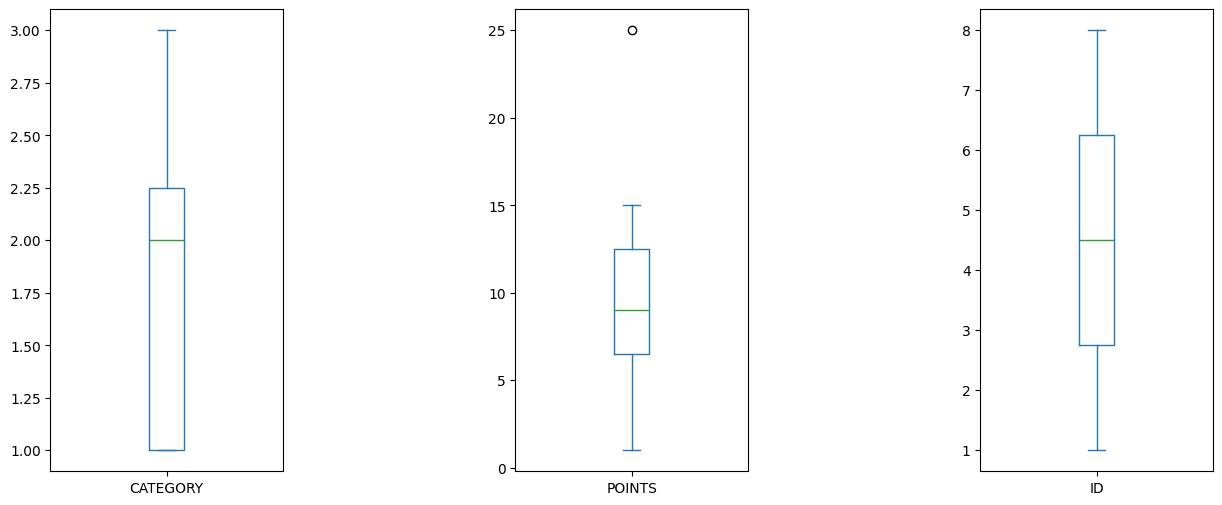

In [33]:
points.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()